# Neural Networks
## Ghazal Kalhor

<div style="text-align: justify; font-weight: bold;">
<i>Abstract</i> — In this computer assignment, we want to classify given photos from clothes into ten classes using Neural Netwoks that we learnt in Artificial Intelligence. We will build our neural network from scratch using method of NumPy library.
    
<i>Keywords</i> — Artificial Intelligence, NumPy, Neural Netwoks
 </div>

### Introduction
<br/>
<div style="text-align: justify;"> 
The aim of this computer assignment is to implement a neural network from scratch and learn its hyper parameters to achieve the highest accuracy in our model.
</div>

### Importing Libraries
<br/>
<div style="text-align: justify;">
In this part, some of the necessary libraries were imported in order to use their helpful functions.
</div>

In [2]:
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

### Importing Data
Contents of files *trainData.csv*, *trainLabels.csv*, *testData.csv*, and *testLabels.csv* were read using *pd.read_csv* and then stored in following dataframes.

In [3]:
train_data = np.loadtxt('trainData.csv', delimiter=",")
test_data = np.loadtxt('testData.csv', delimiter=",")

In [4]:
train_labels = np.loadtxt('trainLabels.csv', delimiter=",")
test_labels = np.loadtxt('testLabels.csv', delimiter=",")

### Phase 1: Visualization and Preprocessing

### Step #1
#### Plotting a Sample of each Class

In [5]:
def plot_original_image(flatten_vect, label):
    print("Class No.", label)
    img = Image.fromarray(flatten_vect.reshape(28, 28))
    plt.imshow(img, interpolation = 'nearest')
    plt.show()

Class No. 0.0


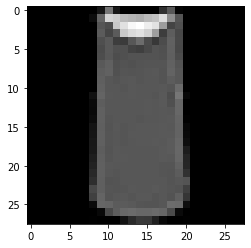

In [6]:
index = 2
plot_original_image(train_data[index], train_labels[index])

Class No. 1.0


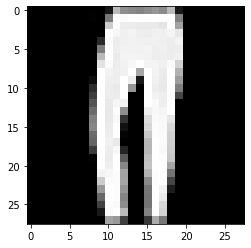

In [7]:
index = 1399
plot_original_image(train_data[index], train_labels[index])

Class No. 2.0


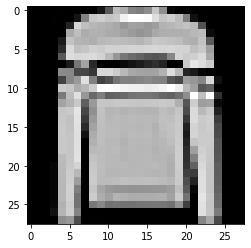

In [8]:
index = 5
plot_original_image(train_data[index], train_labels[index])

Class No. 3.0


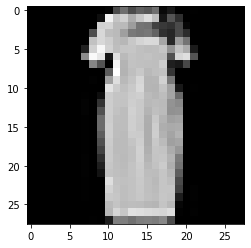

In [9]:
index = 1378
plot_original_image(train_data[index], train_labels[index])

Class No. 4.0


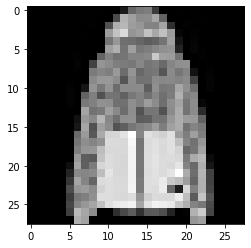

In [10]:
index = 22
plot_original_image(train_data[index], train_labels[index])

Class No. 5.0


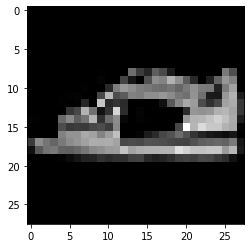

In [11]:
index = 13
plot_original_image(train_data[index], train_labels[index])

Class No. 6.0


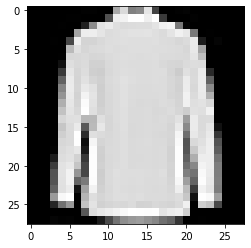

In [12]:
index = 2021
plot_original_image(train_data[index], train_labels[index])

Class No. 7.0


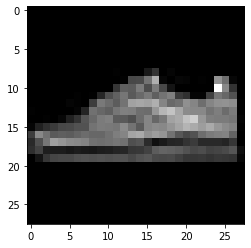

In [13]:
index = 666
plot_original_image(train_data[index], train_labels[index])

Class No. 8.0


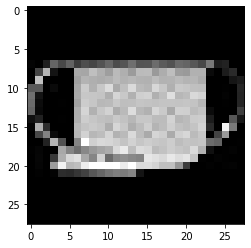

In [14]:
index = 1999
plot_original_image(train_data[index], train_labels[index])

Class No. 9.0


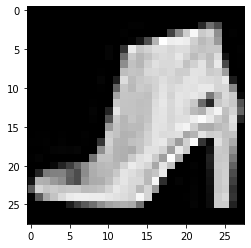

In [15]:
index = 1341
plot_original_image(train_data[index], train_labels[index])

### Step #2
#### Plotting Label Distributin in Tran and Test

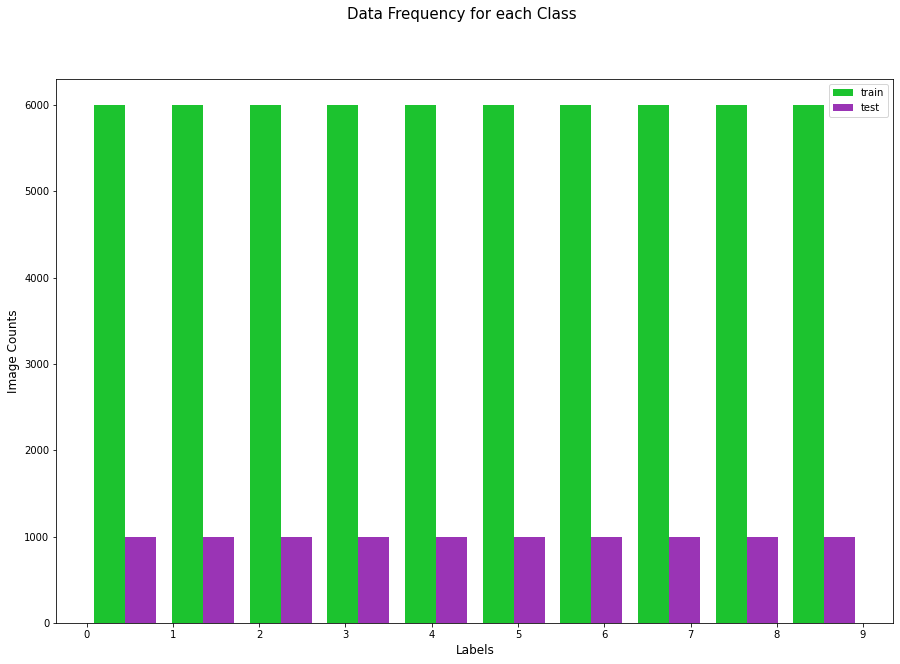

In [92]:
fig = plt.figure(figsize=(15, 10))
labels = (train_labels, test_labels)
plt.hist(labels, label=['train', 'test'], color=['#1cc32f', '#9a34b5'])
plt.xlabel('Labels', fontsize = 12)
plt.ylabel('Image Counts', fontsize = 12)
plt.suptitle('Data Frequency for each Class', fontsize = 15)
plt.legend()
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))
plt.show()

### Step #3
#### Normalizing Image Vectors
<br/>
<div style="text-align: justify;"> 
Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.
</div>

In [17]:
train_data /= 255
test_data /= 255

### Phase 2: Completing the Given Code for Neural Network

### Dataloader

In this part, we completed _onehot_ and *shuffle_dataset* methods of Dataloader class. This class is used for preparing the train and test data for the learning process of our neural network.

_onehot_ method is used to perform one-hot encoding on class labels.

*shuffle_dataset* method is used to shuffle data and labels simultaneously. It is very important that dataset is shuffled well to avoid any element of bias/patternsin the split datasetsbefore training the model.  

In [18]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        # TODO: Implement: Done:)=
        labels = labels.astype(int)
        onehot_vectors = np.zeros((labels.size, n_classes))
        onehot_vectors[np.arange(labels.size), labels] = 1.0
        return onehot_vectors
    
    def __shuffle_dataset(self):
        # TODO: Implement Done:)=
        total_data = np.c_[self.__data.reshape(len(self.__data), -1), \
                          self.__onehot_labels.reshape(len(self.__onehot_labels), -1)]
        np.random.shuffle(total_data)
        data = total_data[:, :self.__data.size//len(self.__data)].reshape(self.__data.shape)
        self.__onehot_labels = total_data[:, self.__data.size//\
                                          len(self.__data):].reshape(self.__onehot_labels.shape)
        self.__data = data
    
    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))
            
    def get_one_hot(self):
        return np.argmax(self.__onehot_labels, axis = 1)

### Activation Functions

In this part, we completed _val_ and *derivative* methods of activation function classes. Also. we added a class for __Tanh__ activation function. We used the following formulas to implement these activation functions.

$$ Relu(x) = \begin{cases} x & x > 0\\
0 & x \leq 0 \end{cases}  \quad \text{and} \quad 
Relu'(x) = \begin{cases} 1 & x > 0\\
0 & x \leq 0 \end{cases} $$

$$ LeakyRelu(x) = \begin{cases} x & x > 0\\
0.01x & x \leq 0 \end{cases} \quad \text{and} \quad 
LeakyRelu'(x) = \begin{cases} 1 & x > 0\\
0.01 & x \leq 0 \end{cases} $$

$$ Sigmoid(x) = \frac{1}{1+e^{-x}} \quad \text{and} \quad 
Sigmoid'(x) = Sigmoid(x)(1-Sigmoid(x)) $$

$$ Tanh'(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} \quad \text{and} \quad 
Tanh'(x) = 1-Tanh(x)^2 
$$

In [96]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __relu(self, matrix):
        # TODO: Implement: Done:)=
        temp = np.matrix(matrix, dtype=float)
        relu_value = np.matrix(np.maximum(temp, 0.))
        return relu_value

    def derivative(self, matrix):
        # TODO: Implement: Done:)=
        relu_derivative = np.matrix(matrix, dtype=float)
        relu_derivative[relu_derivative <= 0] = 0.
        relu_derivative[relu_derivative > 0] = 1.
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__relu(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        # TODO: Implement: Done:)=
        temp = np.matrix(matrix, dtype=float)
        leacky_relu_value = np.matrix(np.where(temp > 0, temp, temp * self.negative_slope))
        return leacky_relu_value

    def derivative(self, matrix):
        # TODO: Implement: Done:)=
        temp = np.matrix(matrix, dtype=float)
        leacky_relu_derivative = np.ones_like(temp)
        leacky_relu_derivative[temp <= 0] = self.negative_slope
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement: Done:)=
        temp = np.matrix(matrix, dtype=float)
        sigmoid_value = np.matrix(1.0/(1.0 + np.exp(-temp)))
        return sigmoid_value

    def derivative(self, matrix):
        # TODO: Implement: Done:)=
        sigmoid_derivative = np.multiply(self.__val(matrix), (1. - self.__val(matrix)))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement: Done:)=
        temp = np.matrix(matrix, dtype=float)
        tanh_value = np.matrix((np.exp(temp) - np.exp(-temp))/(np.exp(temp) + np.exp(-temp)))
        return tanh_value

    def derivative(self, matrix):
        # TODO: Implement: Done:)=
        tanh_derivative = 1 - np.power(self.__val(matrix), 2)
        return tanh_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    
    
class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement: Done:)=
        temp = np.matrix(matrix, dtype=float)
        softmax_value = np.exp(temp - np.max(temp))
        softmax_value /= softmax_value.sum(axis=1)
        return softmax_value
    
    def __call__(self, matrix):
        return self.__val(matrix)

### Loss Function

In this part, we completed _val_ and *derivative* methods of CrossEntropy classes. It is assumed that Sofmax is applied before using the following formulas.

$$ CrossEntropy(y, \hat y) = -\sum_{i} y_i \log{\hat y_i} $$

$$ CrossEntropy'(y, \hat y) = y - \hat y $$

In [97]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement: Done:)=
        softmax = Softmax()
        cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), \
                                                  np.log(softmax(true_val))), axis=1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement: Done:)= 
        softmax = Softmax()
        cross_entropy_derivative = softmax(true_val) - expected_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

### Layer

In this part, we completed _forward_, *update_weights*, *uniform_weight*, and *normal_weight* methods of Layer class. Also we added *he_weight* that implements __he initialization__ method for __Relu__ activation function to avoid vanishing and exploiding in performing gradient descent. We used the following formulas to update weights at the end of each batch.

$$ \frac{\partial L}{\partial W} = x^T\frac{\partial L}{\partial y} $$

$$ \frac{\partial L}{\partial b} = 1\frac{\partial L}{\partial y} $$

$$ \frac{\partial L}{\partial x} = \frac{\partial L}{\partial y}W^T $$

In [98]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight,
                                         'he':self.__he_weight}
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'
        
        self.__n_neurons = output_size
        self.__fan_in = input_size
        self.__fan_out = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        # TODO: Implement: Done:)=
        self.__last_input = layer_input
        self.__last_activation_input = np.add(np.dot(self.__last_input, self.__weight), self.__bias)
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_output)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        # TODO: Implement: Done:)=
        backprop_tensor = np.multiply(backprop_tensor, self.__last_activation_derivative)
        self.__weight -= (lr * np.dot(self.__last_input.T, backprop_tensor))
        self.__bias -= (lr * np.dot(np.ones((1, backprop_tensor.shape[0])), \
                                                                      backprop_tensor))
        backprop_tensor = np.dot(backprop_tensor, self.__weight.T)
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        # TODO: Implement: Done:)=
        weights = np.random.uniform(low, high=high, size=(dim1, dim2))
        return weights
    
    def __he_weight(self, dim1, dim2, **initializing_parameters):
        r = np.sqrt(12./(self.__fan_in, self.__fan_out))
        low, high = -r, r
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        # TODO: Implement: Done:)=
        weights = np.random.uniform(low, high=high, size=(dim1, dim2))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        # TODO: Implement: Done:)=
        weights = np.random.normal(loc=mean, scale=var, size=(dim1, dim2))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

### Feed Forward Neural Network

In this part, we completed the methgod of FeedForwardNN class.

In [99]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None
        
        self.__before_last = None
        self.__before_last_train = None
        self.__before_last_test = None
        
        self.__train_labels = None
        self.__test_labels = None
        
        self.__colors = ['mediumvioletred', 'darkviolet', 'gold', 'turquoise', 'blue', 'springgreen', \
                        'magenta', 'tan', 'chocolate', 'darkgreen']
        self.__classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
        

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else \
        self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, \
                          **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        # TODO: Implement: Done:)=
        network_output = network_input
        for i in range(len(self.__layers_list)):
            network_output = self.__layers_list[i].forward(network_output)
            if i == (len(self.__layers_list)-2):
                self.__before_last = network_output
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            self.__before_last_train = None
            self.__before_last_test = None
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy,\
                                                                               average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy,\
                                                                                  average_loss))
                    
        return log
    
    def early_stopping(self, trainloader, testloader, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        epoch = 1
        
        while True:
            
            self.__before_last_train = None
            self.__before_last_test = None
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            train_accuracy, train_loss = self.__train(trainloader)
            log['train_accuracy'].append(train_accuracy)
            log['train_loss'].append(train_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(train_accuracy,\
                                                                               train_loss))
            
            test_accuracy, test_loss = self.__test(testloader)
            log['test_accuracy'].append(test_accuracy)
            log['test_loss'].append(test_loss)
            if print_results:
                print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(test_accuracy,\
                                                                                test_loss))
            if epoch > 1 and test_accuracy < log['test_accuracy'][len(log['test_accuracy'])-2]:
                break
                
            epoch += 1
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        self.__train_labels = trainloader.get_one_hot()
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        self.__test_labels = testloader.get_one_hot()
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        # TODO: Implement: Done:)=
        output = self.forward(x_batch)
        self.__update_weights(output, y_batch)
        batch_accuracy = self.__compute_accuracy(output, y_batch)
        batch_average_loss = np.mean(self.__loss(output, y_batch))
        if type(self.__before_last_train) is not np.matrix:
            self.__before_last_train = self.__before_last
        else:
            self.__before_last_train = np.concatenate((self.__before_last_train, \
                                                       self.__before_last), axis=0)
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        # TODO: Implement: Done:)=
        output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(output, y_batch)
        batch_average_loss = np.mean(self.__loss(output, y_batch))
        if type(self.__before_last_test) is not np.matrix:
            self.__before_last_test = self.__before_last
        else:
            self.__before_last_test = np.concatenate((self.__before_last_test, \
                                                       self.__before_last), axis=0)
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        # TODO: Implement: Done:)=
        labels = np.argmax(outputs, axis = 1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        # TODO: Implement: Done:)=
        accuracy = (self.__get_labels(output) == self.__get_labels(expected_output)).sum()/output.shape[0]
        accuracy *= 100
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        # TODO: Implement: Done:)=
        for i in reversed(range(len(self.__layers_list))):
            if i == (len(self.__layers_list) - 1):
                backprop_tensor = self.__layers_list[i].\
                update_weights(self.__loss.derivative(output, y_train), self.__lr)
            else:
                backprop_tensor = self.__layers_list[i].update_weights(backprop_tensor, self.__lr)
        return
    
    
    def plot_reduced_dimension_trian(self):
        features = np.array(self.__before_last_train)
        labels = self.__train_labels
        x = features[:,0]
        y = features[:,1]
        fig = plt.figure(figsize=(15, 10))
        plt.scatter(x, y, c=labels, cmap=matplotlib.colors.ListedColormap(self.__colors))
        plt.title('Train Reduced Dimension', fontsize = 15)
        plt.ylabel('2nd Dimension', fontsize = 12)
        plt.xlabel('1st Dimension', fontsize = 12)
        
        cb = plt.colorbar()
        loc = np.arange(0, max(labels), max(labels)/float(len(self.__colors)))
        cb.set_ticks(loc)
        cb.set_ticklabels(self.__classes)
        plt.show()
        
    def plot_reduced_dimension_test(self):
        features = np.array(self.__before_last_test)
        labels = self.__test_labels
        x = features[:,0]
        y = features[:,1]
        fig = plt.figure(figsize=(15, 10))
        plt.scatter(x, y, c=labels, cmap=matplotlib.colors.ListedColormap(self.__colors))
        plt.title('Test Reduced Dimension', fontsize = 15)
        plt.ylabel('2nd Dimension', fontsize = 12)
        plt.xlabel('1st Dimension', fontsize = 12)
        
        cb = plt.colorbar()
        loc = np.arange(0, max(labels), max(labels)/float(len(self.__colors)))
        cb.set_ticks(loc)
        cb.set_ticklabels(self.__classes)
        plt.show()

### Phase 3: Classifying Data

### Step #1

In [100]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
BATCH_SIZE = 32
TRAINLOADER = Dataloader(train_data, train_labels, 10, BATCH_SIZE)
TESTLOADER = Dataloader(test_data, test_labels, 10, BATCH_SIZE)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='he')
network.add_layer(10, activation=Relu(), weight_initializer='he')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 35.26833333333333	Average Loss: 1.7270650013465823
	Test: Average Accuracy: 57.897364217252395	Average Loss: 1.1760277681872764
Epoch 2:
	Train: Average Accuracy: 63.635	Average Loss: 0.9729168544947738
	Test: Average Accuracy: 66.38378594249201	Average Loss: 0.8684203135665756
Epoch 3:
	Train: Average Accuracy: 70.415	Average Loss: 0.7931485822329905
	Test: Average Accuracy: 72.17452076677316	Average Loss: 0.7583906425862659
Epoch 4:
	Train: Average Accuracy: 74.17666666666666	Average Loss: 0.7110941353626407
	Test: Average Accuracy: 75.3694089456869	Average Loss: 0.6944423287536822
Epoch 5:
	Train: Average Accuracy: 76.66666666666667	Average Loss: 0.6552827166475541
	Test: Average Accuracy: 77.09664536741214	Average Loss: 0.651829023188389
Epoch 6:
	Train: Average Accuracy: 78.39666666666666	Average Loss: 0.614323117859118
	Test: Average Accuracy: 78.04512779552715	Average Loss: 0.6224772724808407
Epoch 7:
	Train: Average Accuracy: 79.58	Average Los

### Step #2

#### Learning Rate X 0.1

In this part, when we multiplied the optimum learning rate by 0.1, the speed of the learning process decreased and it seems that we need more epochs to converge to the highest accuracy.

In [101]:
INPUT_SHAPE = 784
LEARNING_RATE = (1e-4) * 0.1
EPOCHS = 30
BATCH_SIZE = 32
TRAINLOADER = Dataloader(train_data, train_labels, 10, BATCH_SIZE)
TESTLOADER = Dataloader(test_data, test_labels, 10, BATCH_SIZE)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='he')
network.add_layer(10, activation=Relu(), weight_initializer='he')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.611666666666666	Average Loss: 2.260236689910968
	Test: Average Accuracy: 11.142172523961662	Average Loss: 2.246001333834595
Epoch 2:
	Train: Average Accuracy: 12.546666666666667	Average Loss: 2.2264843453038585
	Test: Average Accuracy: 12.290335463258787	Average Loss: 2.2019746619744374
Epoch 3:
	Train: Average Accuracy: 18.915	Average Loss: 2.157437190466935
	Test: Average Accuracy: 22.234424920127797	Average Loss: 2.1007224140855145
Epoch 4:
	Train: Average Accuracy: 31.895	Average Loss: 2.0120976747227917
	Test: Average Accuracy: 44.18929712460064	Average Loss: 1.9139581235406313
Epoch 5:
	Train: Average Accuracy: 42.85333333333333	Average Loss: 1.8048451691218588
	Test: Average Accuracy: 49.371006389776355	Average Loss: 1.704333582608462
Epoch 6:
	Train: Average Accuracy: 53.3	Average Loss: 1.613049476760501
	Test: Average Accuracy: 53.66413738019169	Average Loss: 1.535863903339014
Epoch 7:
	Train: Average Accuracy: 57.14	Average Loss: 1.464624

#### Learning Rate X 10

In this part, when we multiplied the optimum learning rate by 10, we faced with the problem of dying Leaky-Relu and its obvious because weight will increase and it can cuase in vanishing in gradients. We can see that there is a small change between accuracies of different epochs.

In [102]:
INPUT_SHAPE = 784
LEARNING_RATE = (1e-4) * 10
EPOCHS = 30
BATCH_SIZE = 32
TRAINLOADER = Dataloader(train_data, train_labels, 10, BATCH_SIZE)
TESTLOADER = Dataloader(test_data, test_labels, 10, BATCH_SIZE)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='he')
network.add_layer(10, activation=Relu(), weight_initializer='he')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 9.99	Average Loss: 2.3883120647417364
	Test: Average Accuracy: 9.984025559105431	Average Loss: 2.302585092994046
Epoch 2:
	Train: Average Accuracy: 10.0	Average Loss: 2.302585092994046
	Test: Average Accuracy: 9.984025559105431	Average Loss: 2.302585092994046
Epoch 3:
	Train: Average Accuracy: 10.0	Average Loss: 2.302585092994046
	Test: Average Accuracy: 9.984025559105431	Average Loss: 2.302585092994046
Epoch 4:
	Train: Average Accuracy: 10.0	Average Loss: 2.302585092994046
	Test: Average Accuracy: 9.984025559105431	Average Loss: 2.302585092994046
Epoch 5:
	Train: Average Accuracy: 10.0	Average Loss: 2.302585092994046
	Test: Average Accuracy: 9.984025559105431	Average Loss: 2.302585092994046
Epoch 6:
	Train: Average Accuracy: 10.0	Average Loss: 2.302585092994046
	Test: Average Accuracy: 9.984025559105431	Average Loss: 2.302585092994046
Epoch 7:
	Train: Average Accuracy: 10.0	Average Loss: 2.302585092994046
	Test: Average Accuracy: 9.984025559105431	Av

### Step #3

#### Why Leaky-Relu is better than Relu?

Firstly, Leaky-Relu has a small slope for negative values, instead of altogether zero. So, this modification will fix the “dying ReLU” problem, as it doesn’t have zero-slope parts.

Secondly, it is faster than Relu in training speeds up training, because having the “mean activation” 
be close to 0 makes training faster.

Finally, unlike Relu, Leaky-Relu is more “balanced,” and may therefore learn faster.

#### Why Sigmoid and Tanh do not work well?

First Problem with __Sigmoid__ is that when the neuron's activation saturates at either tail of 0 or 1, the gradient at these regions is almost zero. Therefore, if the local gradient is very small, it will effectively "kill" the gradient and almost no signal will flow through the neuron to its weights and recursively to its data. Additionally, we must pay extra caution when initializing the weights of sigmoid neurons to prevent saturation. If the initial weights are too large then most neurons would become saturated and the network will barely learn.

Second Problem with __Sigmoid__ is that its outputs are not zero-centered . This is undesirable since neurons in later layers of processing in a Neural Network  would be receiving data that is not zero-centered. This has implications on the dynamics during gradient descent, because if the
data coming into a neuron is always positive, then the gradient on the weights w will during
backpropagation become either all be positive, or all negative. This could introduce
undesirable zig-zagging dynamics in the gradient updates for the weights. However, notice that once these gradients are added up across
a batch of data the final update for the weights can have variable signs, somewhat mitigating this issue. Therefore, this is an
inconvenience but it has less severe consequences compared to the saturated activation problem above.

__Tanh__ squashes a real-valued number to the range [-1, 1]. Like the Sigmoid neuron, its activations saturate, but unlike the Sigmoid neuron its output is zero-centered. Therefore, in practice the Tanh non-linearity is always preferred to the sigmoid nonlinearity.

#### Using Leaky-Relu

In [103]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
BATCH_SIZE = 32
TRAINLOADER = Dataloader(train_data, train_labels, 10, BATCH_SIZE)
TESTLOADER = Dataloader(test_data, test_labels, 10, BATCH_SIZE)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 34.64	Average Loss: 1.7565450622794638
	Test: Average Accuracy: 58.66613418530351	Average Loss: 1.1706641184127702
Epoch 2:
	Train: Average Accuracy: 63.88333333333333	Average Loss: 0.9648554939944207
	Test: Average Accuracy: 66.85303514376997	Average Loss: 0.859489450084683
Epoch 3:
	Train: Average Accuracy: 70.685	Average Loss: 0.7856874578230076
	Test: Average Accuracy: 72.51397763578275	Average Loss: 0.7504397609557348
Epoch 4:
	Train: Average Accuracy: 74.33666666666667	Average Loss: 0.7039351446774033
	Test: Average Accuracy: 75.39936102236422	Average Loss: 0.6872892325514437
Epoch 5:
	Train: Average Accuracy: 76.82	Average Loss: 0.6486018161843424
	Test: Average Accuracy: 77.2064696485623	Average Loss: 0.6455075324011997
Epoch 6:
	Train: Average Accuracy: 78.49333333333334	Average Loss: 0.6081594421256649
	Test: Average Accuracy: 78.1349840255591	Average Loss: 0.6169222679815584
Epoch 7:
	Train: Average Accuracy: 79.69	Average Loss: 0.578139927

#### Using Tanh

In [114]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
BATCH_SIZE = 32
TRAINLOADER = Dataloader(train_data, train_labels, 10, BATCH_SIZE)
TESTLOADER = Dataloader(test_data, test_labels, 10, BATCH_SIZE)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='normal')
network.add_layer(10, activation=Tanh(), weight_initializer='normal')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 9.973333333333333	Average Loss: 2.302978394510847
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.3028611472069294
Epoch 2:
	Train: Average Accuracy: 9.868333333333334	Average Loss: 2.3029365067888006
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.3028237948411827
Epoch 3:
	Train: Average Accuracy: 9.865	Average Loss: 2.302868242386226
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.302728347596802
Epoch 4:
	Train: Average Accuracy: 9.87	Average Loss: 2.302725447416856
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.3025390424257752
Epoch 5:
	Train: Average Accuracy: 9.918333333333333	Average Loss: 2.3024578683164667
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.3021892638253867
Epoch 6:
	Train: Average Accuracy: 10.075	Average Loss: 2.3019520766313515
	Test: Average Accuracy: 10.023961661341852	Average Loss: 2.301483589220706
Epoch 7:
	Train: Average Accuracy: 10.496666666666666	Average Loss: 

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: overflow encountered in exp
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in true_divide


	Train: Average Accuracy: 38.07833333333333	Average Loss: nan
	Test: Average Accuracy: 9.984025559105431	Average Loss: nan


#### Using Sigmoid

In [105]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
BATCH_SIZE = 32
TRAINLOADER = Dataloader(train_data, train_labels, 10, BATCH_SIZE)
TESTLOADER = Dataloader(test_data, test_labels, 10, BATCH_SIZE)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(10, activation=Sigmoid(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.001666666666667	Average Loss: 2.3025623211933173
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.3024330445096193
Epoch 2:
	Train: Average Accuracy: 9.911666666666667	Average Loss: 2.3024518079966776
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.302393997914763
Epoch 3:
	Train: Average Accuracy: 9.831666666666667	Average Loss: 2.3024208493756895
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.302366261135662
Epoch 4:
	Train: Average Accuracy: 9.78	Average Loss: 2.3023895481903836
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.3023327162248766
Epoch 5:
	Train: Average Accuracy: 9.838333333333333	Average Loss: 2.3023531971787956
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.30229464762954
Epoch 6:
	Train: Average Accuracy: 9.821666666666667	Average Loss: 2.302313042778187
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.3022531399305644
Epoch 7:
	Train: Average Accuracy: 9.82	Avera

### Step #4

#### What is the philosophy behind the use of batches?

We use batches instead of the whole data for the following reasons:

1- It requires less memory. As we train our network using fewer samples, the overall training process requires less memory. This is very important when we are not able to fit the whole dataset in our machine's memory.

2- Typically networks train faster with mini-batches, because we update the weights after each propagation. If we used all samples during propagation, we would make only 1 update for the network's parameter and this can lead to underfitting.

#### What is the problem with extremely small batches?

There is no doubt that the smaller the batch is the less accurate the estimation of the gradient will be. If we use extremely small batch size, we would lose the effectiveness of vectorization. Moreover, It will produce a noisier gradient descent. As a result, we prefer to use bigger batch size.

#### Setting Batch-Size to 16

In this part, when we set the batch-size to 16, the speed of learning increased and our model reached to the desirable accuracy faster. It is obvious that the more batches we train our model, the more weight updates are performed and we get better results.

In [106]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
BATCH_SIZE = 16
TRAINLOADER = Dataloader(train_data, train_labels, 10, BATCH_SIZE)
TESTLOADER = Dataloader(test_data, test_labels, 10, BATCH_SIZE)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 35.915	Average Loss: 1.744707502195137
	Test: Average Accuracy: 58.29	Average Loss: 1.1432801330785543
Epoch 2:
	Train: Average Accuracy: 63.916666666666664	Average Loss: 0.9608971289877295
	Test: Average Accuracy: 67.72	Average Loss: 0.8499426383919035
Epoch 3:
	Train: Average Accuracy: 70.49333333333334	Average Loss: 0.7863745017530492
	Test: Average Accuracy: 72.92	Average Loss: 0.7456677127700301
Epoch 4:
	Train: Average Accuracy: 74.61833333333334	Average Loss: 0.7025278780256119
	Test: Average Accuracy: 75.97	Average Loss: 0.6798142975200804
Epoch 5:
	Train: Average Accuracy: 77.12666666666667	Average Loss: 0.6450549453740927
	Test: Average Accuracy: 77.69	Average Loss: 0.6343844527306115
Epoch 6:
	Train: Average Accuracy: 78.90666666666667	Average Loss: 0.6036528673438222
	Test: Average Accuracy: 78.64	Average Loss: 0.6027784781520771
Epoch 7:
	Train: Average Accuracy: 80.11833333333334	Average Loss: 0.573388421545949
	Test: Average Accuracy: 7

#### Setting Batch-Size to 128

In this part, when we set the batch-size to 128, the speed of learning decreased. So, it is better to use smaller batch size to make the process of learning faster.

In [107]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 30
BATCH_SIZE = 128
TRAINLOADER = Dataloader(train_data, train_labels, 10, BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(test_data, test_labels, 10, BATCH_SIZE, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.250088841506752	Average Loss: 2.340221710371429
	Test: Average Accuracy: 10.03757911392405	Average Loss: 2.2989253166781203
Epoch 2:
	Train: Average Accuracy: 9.955246090973704	Average Loss: 2.298057653787562
	Test: Average Accuracy: 9.889240506329115	Average Loss: 2.295701465886236
Epoch 3:
	Train: Average Accuracy: 9.699271499644633	Average Loss: 2.2938159631836728
	Test: Average Accuracy: 9.731012658227849	Average Loss: 2.2921471449945
Epoch 4:
	Train: Average Accuracy: 9.864738805970148	Average Loss: 2.2923725743463446
	Test: Average Accuracy: 10.314477848101266	Average Loss: 2.2908231261905474
Epoch 5:
	Train: Average Accuracy: 9.952469793887703	Average Loss: 2.289488244755758
	Test: Average Accuracy: 9.889240506329115	Average Loss: 2.287670181550202
Epoch 6:
	Train: Average Accuracy: 10.278962331201136	Average Loss: 2.2880905372643556
	Test: Average Accuracy: 10.245253164556962	Average Loss: 2.2860076846671658
Epoch 7:
	Train: Average Accurac

### Step #5

#### Why we use multiple epochs in training Neural Networks?

It is undeniable that we want to get good performance on non-training data and usually that takes more than one pass over the training data. Moreover, it is typical that gradient descent does not reach a global or local minimum after the first epoch. So, training just one epoch can lead to underfitting. As a result, we use multiple epochs.

#### Overfitting in Neural Networks

One of the signs of overfitting in neural networks is that the test accuracy starts to decrease and we use early stoppung technique to prevent it. When we train our model in many epochs, out model starts to classify the noises in the training data and we shoud stop the process of learning in this situation. Another situation that leads to overfitting is that we consider a very complex architecture for our neural network in a simple problem.

In [108]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
BATCH_SIZE = 16
TRAINLOADER = Dataloader(train_data, train_labels, 10, BATCH_SIZE)
TESTLOADER = Dataloader(test_data, test_labels, 10, BATCH_SIZE)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.early_stopping(TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 35.66833333333334	Average Loss: 1.756776884764874
	Test: Average Accuracy: 59.15	Average Loss: 1.153408016323865
Epoch 2:
	Train: Average Accuracy: 64.09	Average Loss: 0.9639426341238299
	Test: Average Accuracy: 68.04	Average Loss: 0.8476625167933842
Epoch 3:
	Train: Average Accuracy: 70.645	Average Loss: 0.7842946892053245
	Test: Average Accuracy: 72.99	Average Loss: 0.7446588570140661
Epoch 4:
	Train: Average Accuracy: 74.44166666666666	Average Loss: 0.7024318488055302
	Test: Average Accuracy: 75.81	Average Loss: 0.6813653727492837
Epoch 5:
	Train: Average Accuracy: 76.92666666666666	Average Loss: 0.6465723936701218
	Test: Average Accuracy: 77.59	Average Loss: 0.637107505106073
Epoch 6:
	Train: Average Accuracy: 78.78166666666667	Average Loss: 0.6055091410148158
	Test: Average Accuracy: 78.84	Average Loss: 0.6054182859450948
Epoch 7:
	Train: Average Accuracy: 80.035	Average Loss: 0.5747351641205418
	Test: Average Accuracy: 79.56	Average Loss: 0.5824

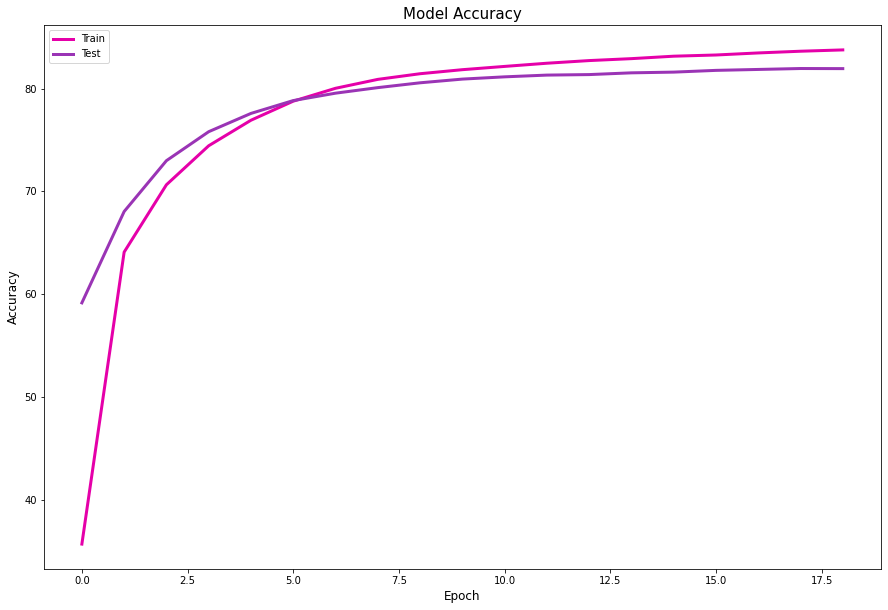

In [109]:
fig = plt.figure(figsize=(15, 10))
plt.plot(log['train_accuracy'], linewidth = 3, color = '#e500a9')
plt.plot(log['test_accuracy'], linewidth = 3, color = '#9a34b5')
plt.title('Model Accuracy', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.legend(['Train', 'Test'], loc='upper left')

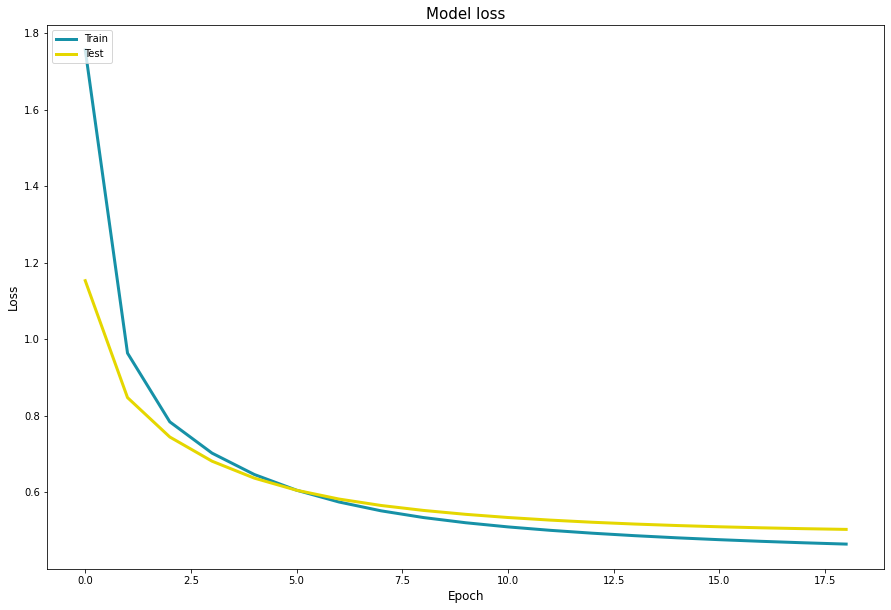

In [110]:
fig = plt.figure(figsize=(15, 10))
plt.plot(log['train_loss'], linewidth = 3, color = '#1691a7')
plt.plot(log['test_loss'], linewidth = 3, color = '#e5d700')
plt.title('Model loss', fontsize = 15)
plt.ylabel('Loss', fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.legend(['Train', 'Test'], loc='upper left')

### Phase 4: Plotting Reduced Dimension

Based on the results, we can see that our model works well in classifying photos of shoes (class no. 7 and 9) from the other types of clothes. This obvious, because there are many differences between these photos. 

Also, we have the same scenarion for photos of the bags (class no. 8).

Moreover, our model can classify photos of pants from other clothes (class no. 1).

But, our model gets a little bit confused in classifying other photos because they have a lot of similarities and it seems that we need a more complex architecture for our model to increase its power in classification.

In [111]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-4
EPOCHS = 20
BATCH_SIZE = 16
TRAINLOADER = Dataloader(train_data, train_labels, 10, BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(test_data, test_labels, 10, BATCH_SIZE, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(2, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 17.226666666666667	Average Loss: 2.0999771889759993
	Test: Average Accuracy: 27.48	Average Loss: 1.7207062557892772
Epoch 2:
	Train: Average Accuracy: 43.11833333333333	Average Loss: 1.431832586171235
	Test: Average Accuracy: 47.54	Average Loss: 1.2566495714843735
Epoch 3:
	Train: Average Accuracy: 53.42666666666667	Average Loss: 1.1838155270561237
	Test: Average Accuracy: 55.15	Average Loss: 1.1408121650277594
Epoch 4:
	Train: Average Accuracy: 56.72833333333333	Average Loss: 1.09979237918151
	Test: Average Accuracy: 56.91	Average Loss: 1.083583560165818
Epoch 5:
	Train: Average Accuracy: 58.038333333333334	Average Loss: 1.0509894532309134
	Test: Average Accuracy: 58.14	Average Loss: 1.044870247515816
Epoch 6:
	Train: Average Accuracy: 59.51166666666666	Average Loss: 1.0175791938559111
	Test: Average Accuracy: 61.42	Average Loss: 1.0192211509806566
Epoch 7:
	Train: Average Accuracy: 60.53666666666667	Average Loss: 0.9933646701549779
	Test: Average Ac

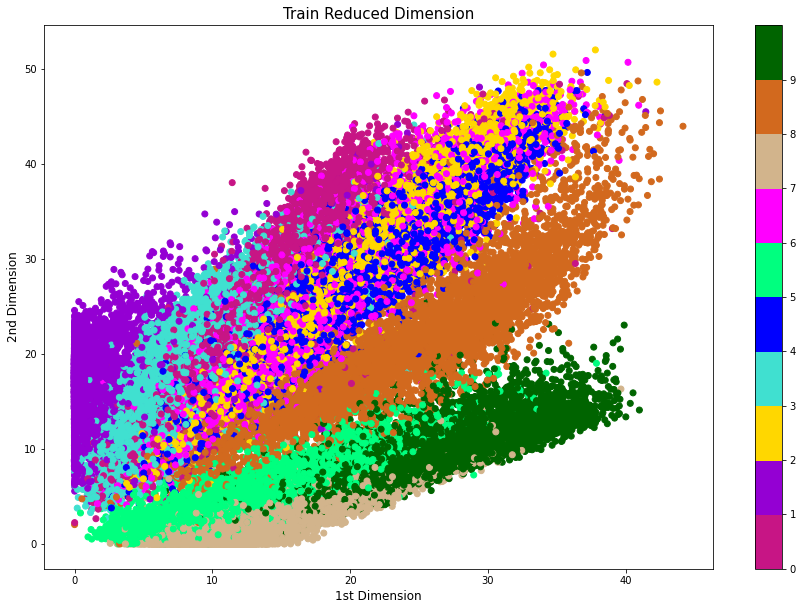

In [112]:
network.plot_reduced_dimension_trian()

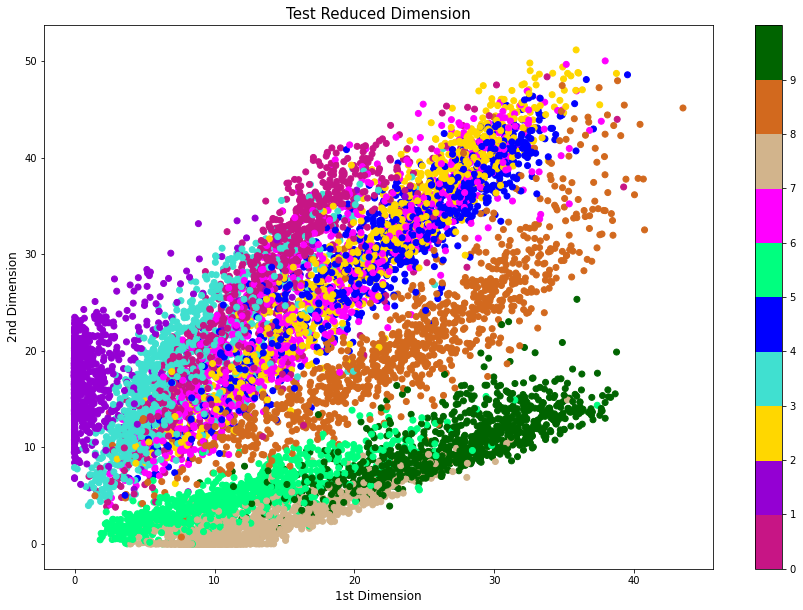

In [113]:
network.plot_reduced_dimension_test()

### Conclusion
<br/>
<div style="text-align: justify;"> 
In this computer assignment we learned that neural networks are good methods to solve image classification problems. Also, we were learned to some linear algebra methods to implements formulas in a neural network. 
</div>